In [28]:
import sys
sys.path.append('../')

import pickle as pkl
from src.utils import load_file


The following scripts must have been executed prior to this notebook:

- get_graph_data.py to retrieve the graphs, boundaries, and GDMs
- get_node_linkage.py to obtain the linkage matrix of the desired clustering method

# Node Clustering based on the Graphlet Degree Vector

In this notebook I implement node clustering for street networks based on their graphlet degree vectors. The approach mirrors the approach proposed by Milenkovic and Przulj (https://www3.nd.edu/~tmilenko/papers/CI_08_GDD_sign.pdf). We will need to:

(i) Compute the graphlet degree vector of each node

(ii) Compute a distance matrix between all nodes based on the distance function D_GDV, to be defined

(iii) Cluster this metric space using (say) hierarchical clustering with single linkage

Steps (ii) and (iii) can be done in two different settings: either we consider each city as a disjoint metric space and cluster the nodes within that city only, or we group all the nodes of all cities and cluster them together. We will consider the approach of a single city due to space constraints

## 1. Loading Graph Data

In [2]:
graphs_dict = load_file('../data/d2_processed/graphs_dict.pickle')
node_gdfs_dict = load_file('../data/d2_processed/node_gdfs_dict.pickle')
GDMs_dict = load_file('../data/d2_processed/GDMs_dict.pickle')

## 2. Clustering

In [ ]:
linkage_dict = load_file('../data/d3_results/linkage_dict.pickle')

In [ ]:
fig, ax = plt.subplots(figsize=(20,15))
        
dend = shc.dendrogram(linkage, color_threshold=0.125,
                      truncate_mode='level', p=7,
                      ax=ax)

plt.show()

In [ ]:
flat_cluster_arr = shc.fcluster(linkage, t=7, criterion='maxclust')
nodes_gdf['cluster-7'] = flat_cluster_arr

In [ ]:
fig, ax = plt.subplots(figsize=(30, 30))

ax = ox.plot_graph(G, ax=ax, node_size=1, edge_alpha=0.5, show=False)[1]
ax = nodes_gdf.plot(ax=ax, column='cluster-7', alpha=0.5, markersize=150)
ax.set_title("New York City", fontsize=50)

plt.show()

### iiib. Paris

In [ ]:
Gp, GDMp = graphs_dict[('Paris', 'France')], GDMs_dict[('Paris', 'France')]
nodes_gdfp = ox.graph_to_gdfs(Gp, edges=False)

D_matrixp = get_D_matrix(GDMp)
filepathp = '../data/test-run/Dmatrixp.pickle'
with open(filepathp, 'wb') as file:
    pkl.dump(D_matrixp, file)
    
linkagep = shc.linkage(D_matrixp, method='single')
filepathp_link = '../data/test-run/linkagep.pickle'
with open(filepathp_link, 'wb') as file:
    pkl.dump(linkagep, file)

In [ ]:
flat_cluster_arrp = shc.fcluster(linkagep, t=7, criterion='maxclust')
nodes_gdfp['cluster-7'] = flat_cluster_arrp

fig, ax = plt.subplots(figsize=(20,15))        
dend = shc.dendrogram(linkagep, color_threshold=0.125,
                      truncate_mode='level', p=7,
                      ax=ax)
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(30, 30))

ax = ox.plot_graph(Gp, ax=ax, node_size=1, edge_alpha=0.5, show=False)[1]
ax = nodes_gdfp.plot(ax=ax, column='cluster-7', alpha=0.5, markersize=150)
ax.set_title("Paris", fontsize=50)

plt.show()

In [2]:
from src import node_clustering as nc

In [3]:
from src.get_graph import simplify_graph
G = dict()
G[('UWS', 'US')]= simplify_graph(ox.graph_from_place("Upper West Side, Manhattan", network_type='drive'))

In [4]:
from src.get_GDM import get_GDMs
GDM_dict, nodes_gdf_dict = get_GDMs(G, save=False, get_nodes_gdf=True)
GDM, nodes_gdf = GDM_dict[('UWS', 'US')], nodes_gdf_dict[('UWS', 'US')]

100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  6.23it/s]


In [7]:
D = nc.get_D_matrix(GDM)

In [13]:
from scipy.spatial.distance import squareform
linkage = shc.linkage(squareform(D), method='single')

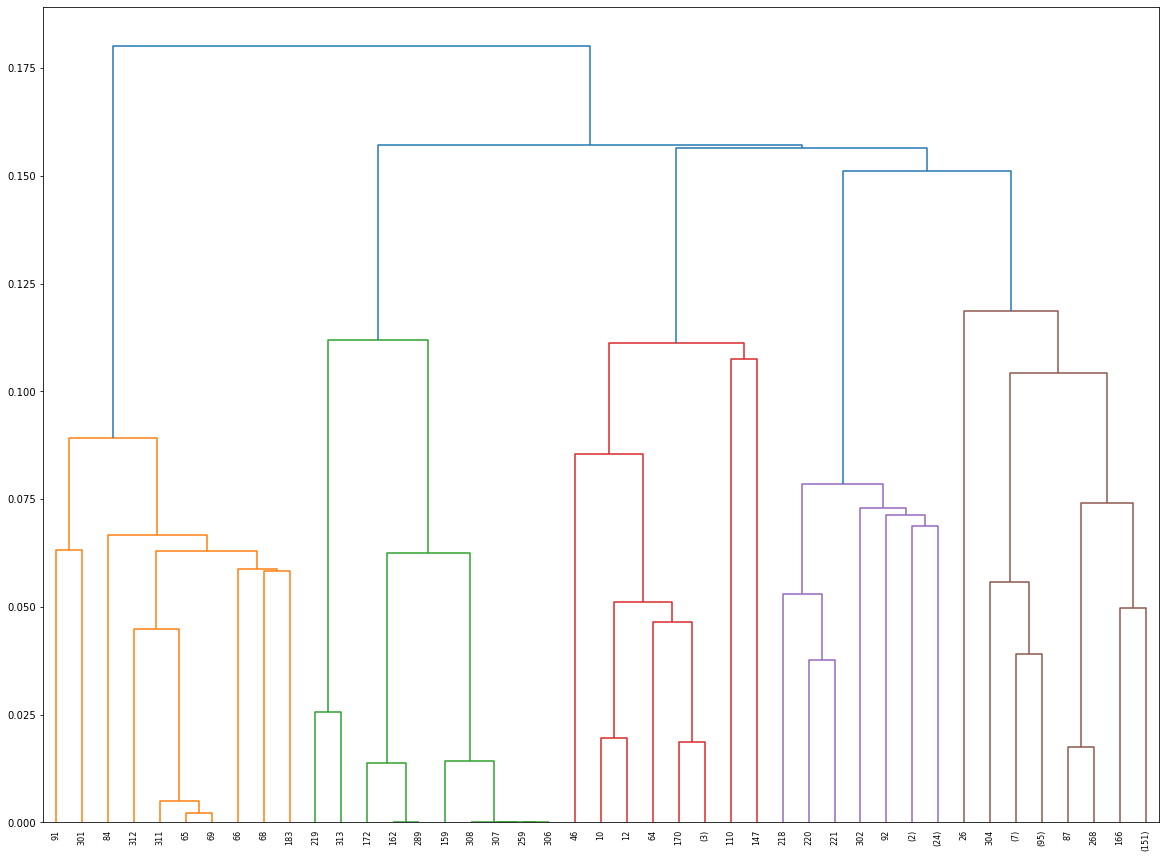

In [15]:
fig, ax = plt.subplots(figsize=(20,15))
        
dend = shc.dendrogram(linkage, color_threshold=0.125,
                      truncate_mode='level', p=7,
                      ax=ax)

plt.show()

In [16]:
flat_cluster_arr = shc.fcluster(linkage, t=7, criterion='maxclust')
nodes_gdf['cluster-7'] = flat_cluster_arr

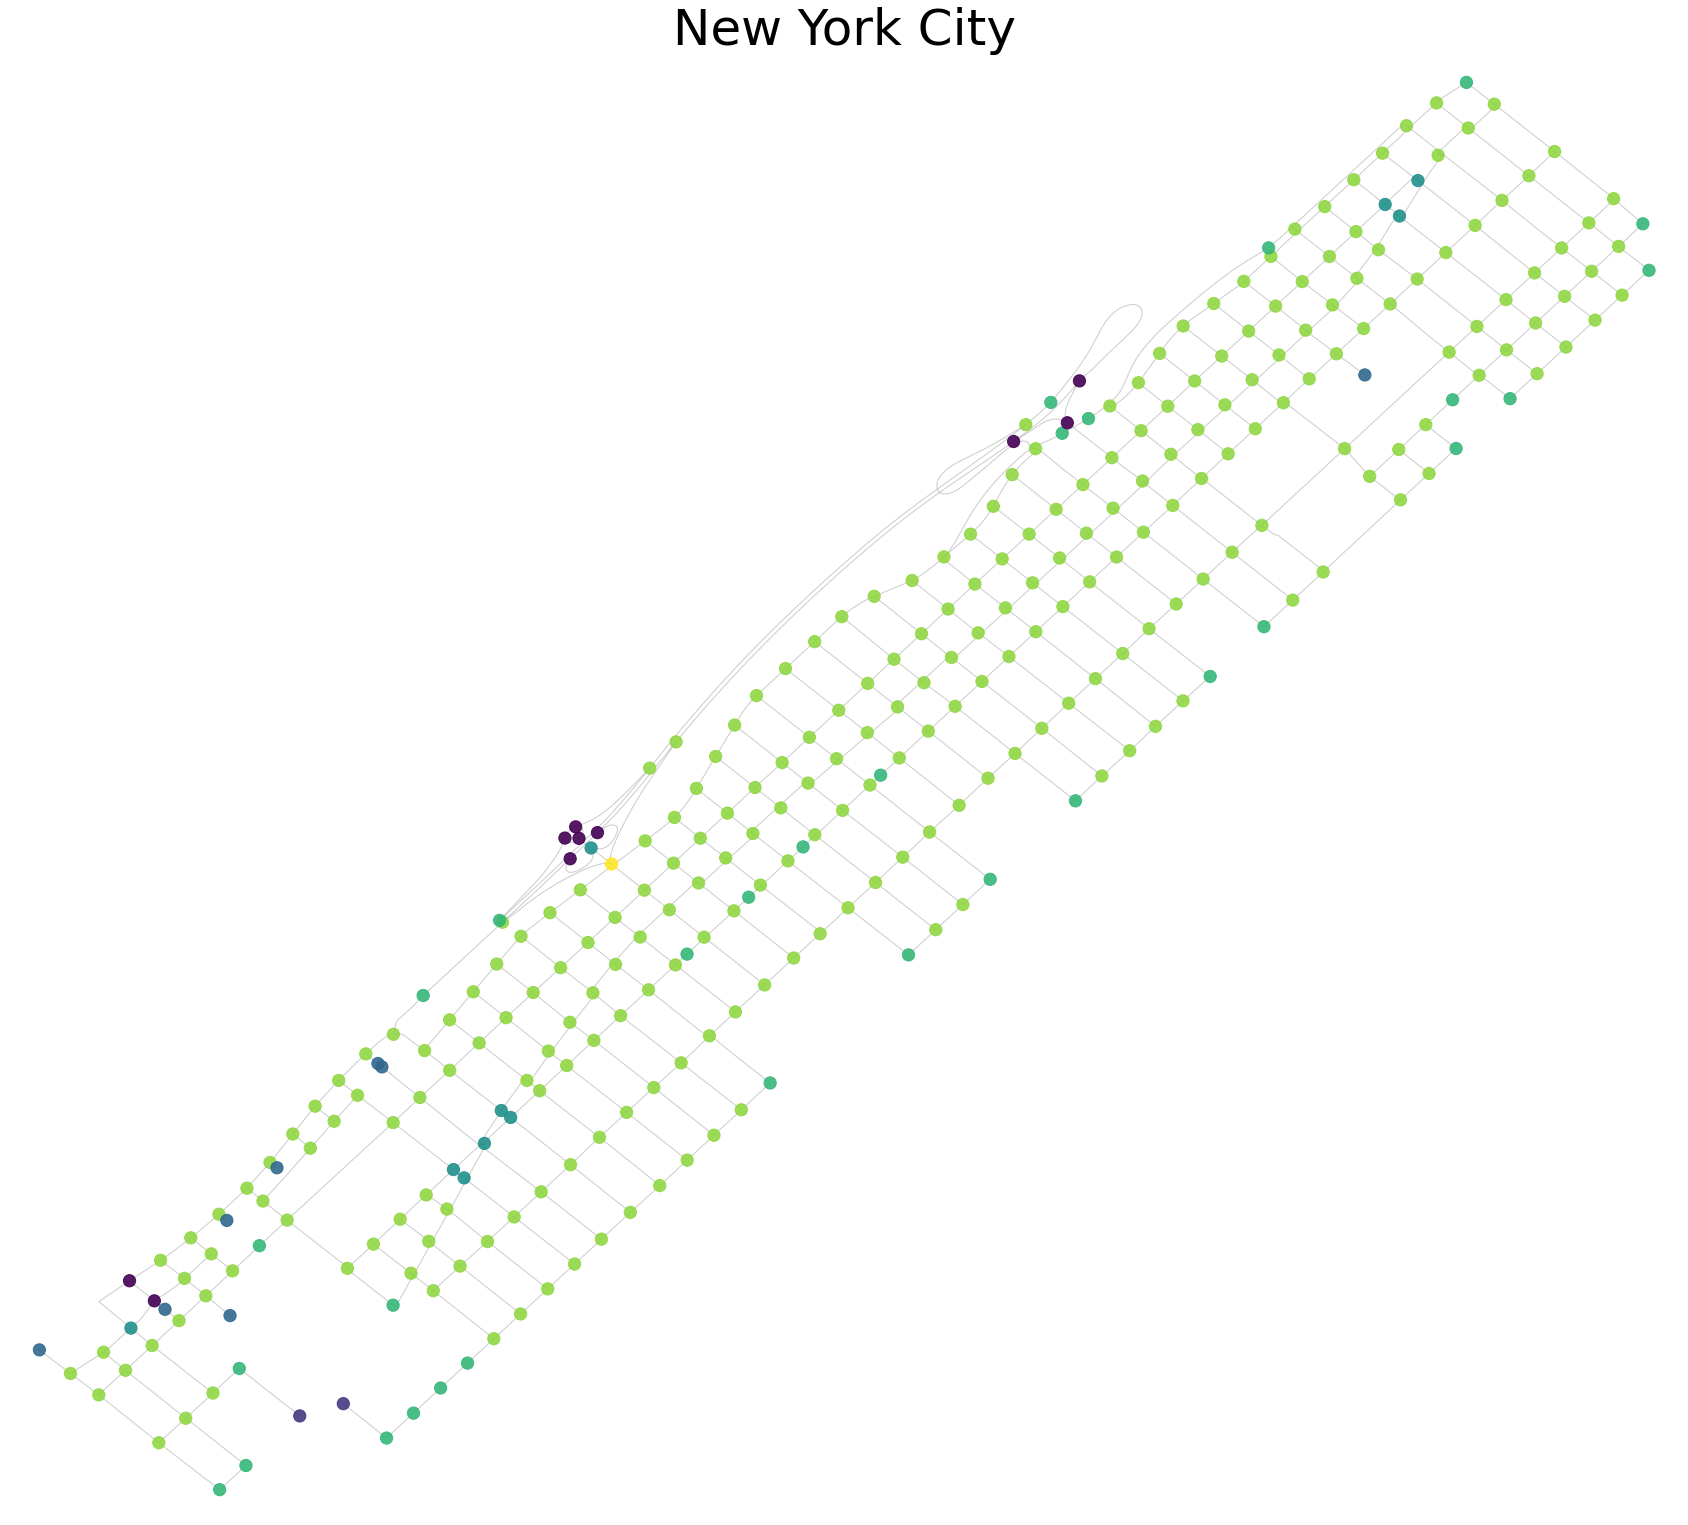

In [32]:
fig, ax = plt.subplots(figsize=(30, 30))

graph = ox.project_graph(G[('UWS', 'US')], to_crs=nodes_gdf.crs)

ox.plot_graph(graph, ax=ax, node_size=0, edge_alpha=0.5, show=False, close=False)
nodes_gdf.plot(ax=ax, column='cluster-7', alpha=0.9, markersize=150, zorder=30)
ax.set_title("New York City", fontsize=50)

plt.show()

In [1]:
import multiprocessing
num_cores = multiprocessing.cpu_count()

In [2]:
num_cores

4

In [3]:
from joblib import Parallel, delayed

import multiprocessing
# what are your inputs, and what operation do you want to

# perform on each input. For example...

inputs = range(10)

def processInput(i):

	return i * i


num_cores = multiprocessing.cpu_count()
results = Parallel(n_jobs=num_cores)(delayed(processInput)(i) for i in inputs)

In [4]:
results

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]

In [11]:
A = dict()
A[0] = 2
A['2']=4
A['banana']='mas'

list(A.keys())

[0, '2', 'banana']

In [10]:
list(A.values())

[2, 4, 'mas']

In [13]:
a = (1, [22,3])

In [14]:
a.type()

AttributeError: 'tuple' object has no attribute 'type'

In [15]:
type(a)

tuple

In [23]:
from joblib import Parallel, delayed
import multiprocessing
num_cores = multiprocessing.cpu_count()

def f(A, method, metric):
    return A + '_' + method

def get_Dmatrix_and_linkages(GDM, cluster_methods, num_cores=num_cores):
    """
    Gets a distance matrix and a linkage matrix given a single GDM and a cluster method
    
    :param GDM: numpy array, graphlet degree matrix
    :param cluster_method: string detailing type of agglomerative clustering; one of single, complete, average, or weighted
    
    :return tuple of condensed distance matrix, array
    """
    
    D_matrix = GDM + '_dmatrix'
    linkage_arr_list = Parallel(n_jobs=num_cores)(delayed(f)(D_matrix, method=cluster_method, metric=None)
                                                                  for cluster_method in cluster_methods)
    return (D_matrix, linkage_arr_list)

cluster_methods = ['singlelinkage', 'completelinkage']
GDMs = ['NY', 'Hague']
outputs = Parallel(n_jobs=num_cores)(delayed(get_Dmatrix_and_linkages)(GDM, cluster_methods=cluster_methods) for GDM in GDMs)

In [24]:
outputs

[('NY_dmatrix', ['NY_dmatrix_singlelinkage', 'NY_dmatrix_completelinkage']),
 ('Hague_dmatrix',
  ['Hague_dmatrix_singlelinkage', 'Hague_dmatrix_completelinkage'])]

In [26]:
keys = ['NY', 'Hague']
D_matrix_list = [output_tuple[0] for output_tuple in outputs]
D_matrix_dict = dict(zip(keys, D_matrix_list))
print(D_matrix_dict)
print("\n")

i = 0
for method in cluster_methods:
    linkage_list = [output_tuple[1][i] for output_tuple in outputs]
    linkage_dict = dict(zip(keys, linkage_list))
    print(linkage_dict)
    i+=1

{'NY': 'NY_dmatrix', 'Hague': 'Hague_dmatrix'}


{'NY': 'NY_dmatrix_singlelinkage', 'Hague': 'Hague_dmatrix_singlelinkage'}
{'NY': 'NY_dmatrix_completelinkage', 'Hague': 'Hague_dmatrix_completelinkage'}


In [59]:
GDMs_dict = load_file('../data/d2_processed/GDMs_dict.pickle')
graphs_dict = load_file('../data/d2_processed/graphs_dict.pickle')
node_gdfs_dict = load_file('../data/d2_processed/node_gdfs_dict.pickle')

In [60]:
Dmatrix_dict = load_file('../data/d3_results/Dmatrix_dict.pickle')
completelink_dict = load_file('../data/d3_results/complete_linkage_dict.pickle')
singlelink_dict = load_file('../data/d3_results/single_linkage_dict.pickle')
averagelink_dict = load_file('../data/d3_results/average_linkage_dict.pickle')

In [62]:
GDMs_dict

{('Harlem',
  'New York'): array([[3, 4, 3, ..., 0, 0, 0],
        [2, 3, 1, ..., 0, 0, 0],
        [3, 7, 3, ..., 0, 0, 0],
        ...,
        [2, 5, 1, ..., 0, 0, 0],
        [1, 1, 0, ..., 0, 0, 0],
        [4, 8, 5, ..., 0, 0, 0]]),
 ('Upper West Side Manhattan',
  'New York'): array([[3, 7, 3, ..., 0, 0, 0],
        [3, 7, 3, ..., 0, 0, 0],
        [3, 6, 3, ..., 0, 0, 0],
        ...,
        [3, 7, 3, ..., 0, 0, 0],
        [3, 5, 3, ..., 0, 0, 0],
        [2, 4, 1, ..., 0, 0, 0]]),
 ('Morningside Heights',
  'New York'): array([[ 3,  8,  3, ...,  0,  0,  0],
        [ 3,  7,  3, ...,  0,  0,  0],
        [ 5, 11, 10, ...,  0,  0,  0],
        ...,
        [ 3,  4,  2, ...,  0,  0,  0],
        [ 3,  5,  2, ...,  0,  0,  0],
        [ 3,  7,  3, ...,  0,  0,  0]])}

In [63]:
key = ('Upper West Side Manhattan','New York')

graph = graphs_dict[key]
node_gdf = node_gdfs_dict[key]
Dmatrix = Dmatrix_dict[key]
singlelink = singlelink_dict[key]
completelink = completelink_dict[key]
averagelink = averagelink_dict[key]

In [64]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
import osmnx as ox

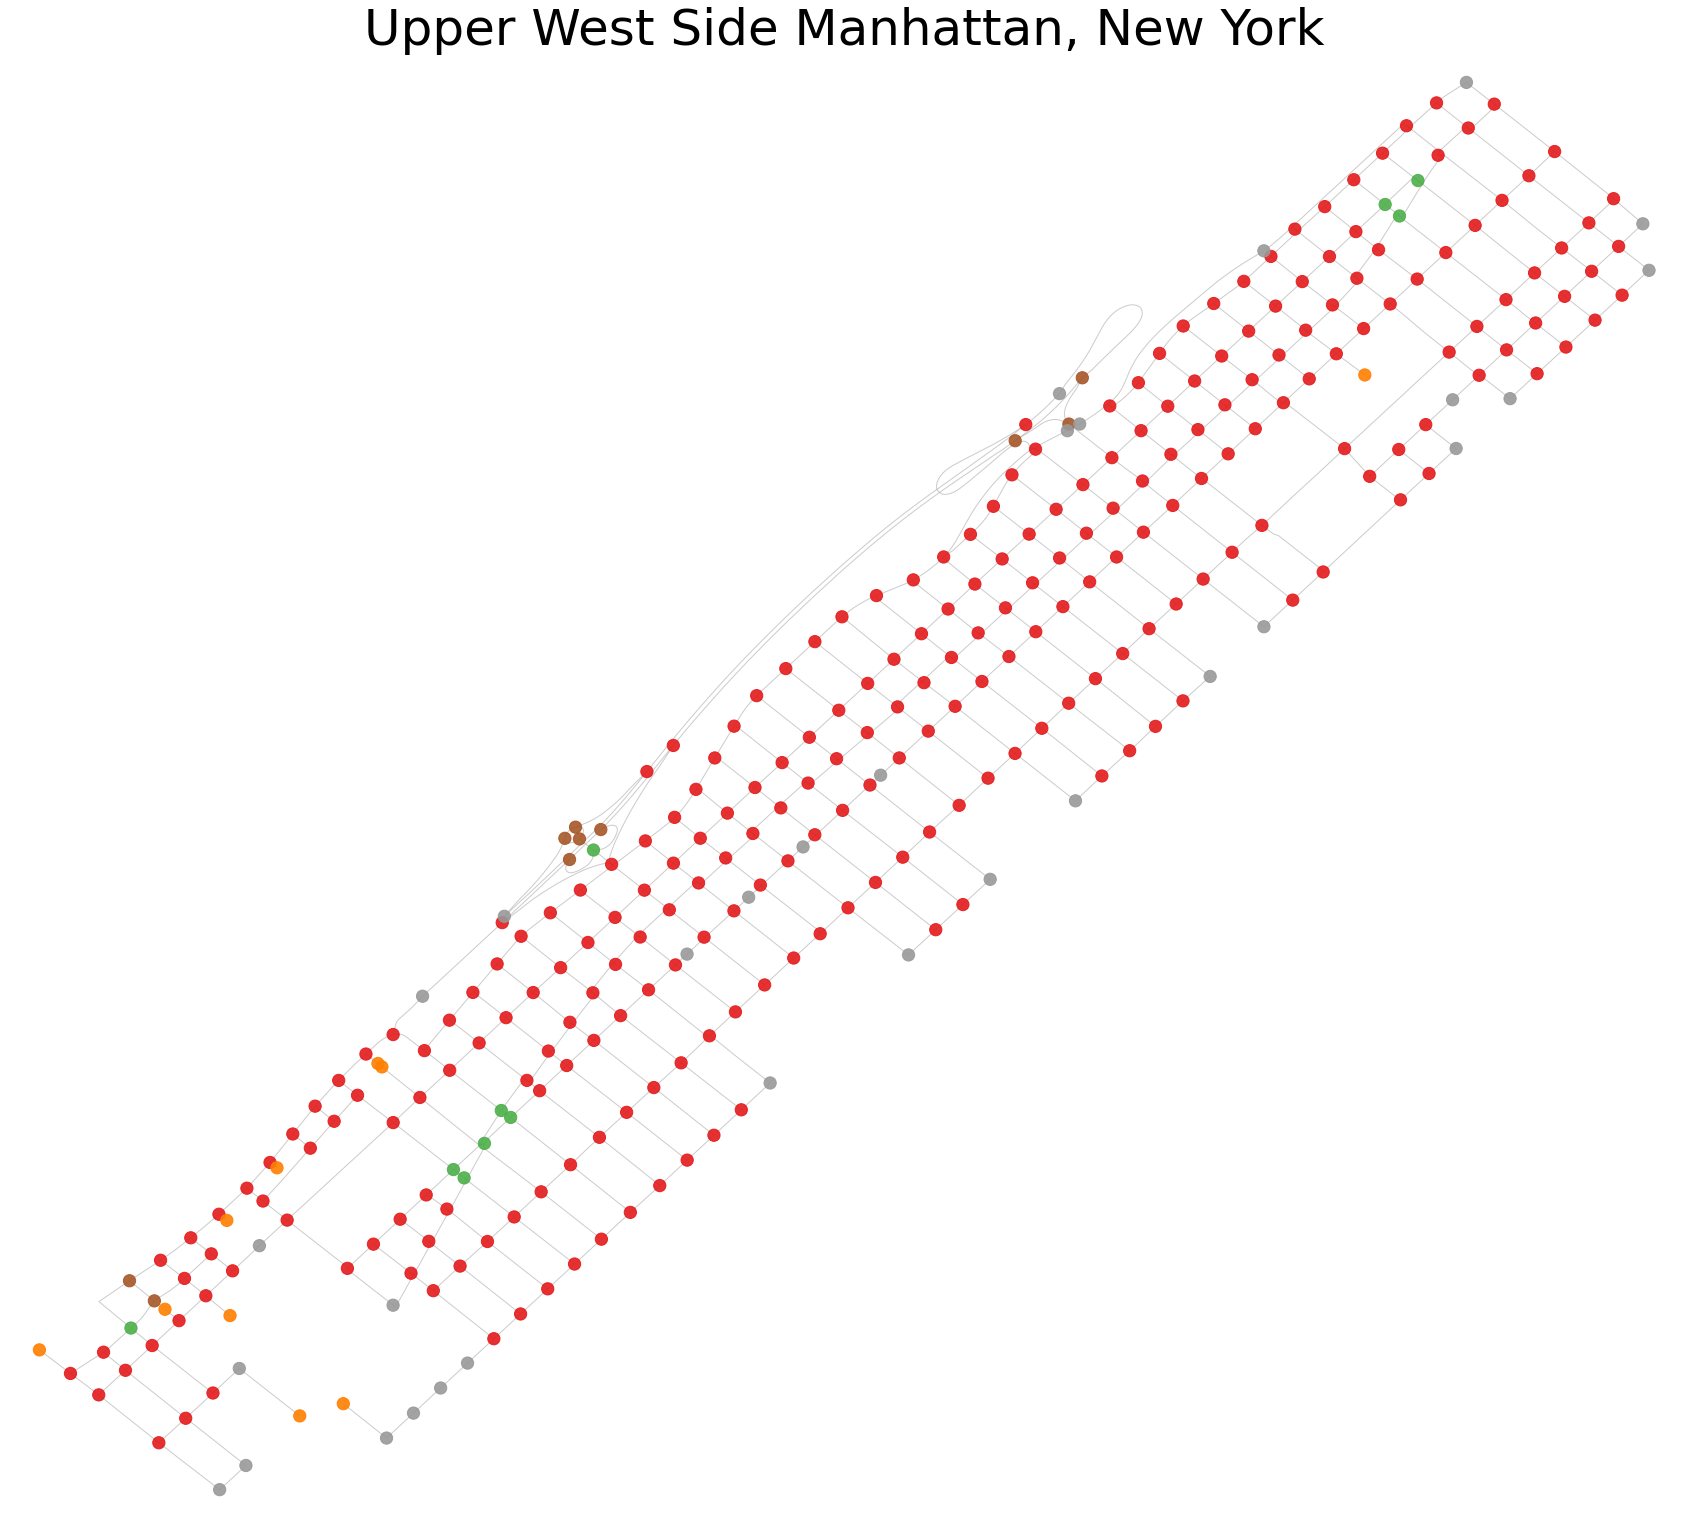

In [74]:
linkage = averagelink

flat_cluster_arr = sch.fcluster(linkage, t=5, criterion='maxclust')
node_gdf['cluster-7'] = flat_cluster_arr

fig, ax = plt.subplots(figsize=(30, 30))
graph_proj = ox.project_graph(graph, to_crs=node_gdf.crs)
ox.plot_graph(graph_proj, ax=ax, node_size=0, edge_alpha=0.5, show=False, close=False)
node_gdf.plot(ax=ax, column='cluster-7', alpha=0.9, markersize=150, zorder=30, categorical=True, cmap='Set1')
ax.set_title(', '.join(key), fontsize=50)

plt.show()